In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("supply_chain_extended_data (2).csv")
df.head()

,Warehouse_ID,Location,Current_Stock,Demand_Forecast,Lead_Time_Days,Shipping_Time_Days,Stockout_Risk,Operational_Cost,Supplier_ID,Product_Category,Monthly_Sales,Order_Processing_Time,Return_Rate,Customer_Rating,Warehouse_Capacity,Storage_Cost,Transportation_Cost,Backorder_Quantity,Damaged_Goods,Employee_Count
0,WH239,Dallas,3926,484,8,3,7,93895,S693,Groceries,4893,4.766231,6.053952,3.840976,28701,16975,2778,228,26,83
1,WH244,Houston,3032,5122,3,6,25,46847,S880,Electronics,4453,4.304335,3.886996,2.113929,36198,14052,1535,288,16,39
2,WH340,Chicago,4763,4343,5,5,16,64176,S116,Furniture,5956,1.030779,7.335160,4.211437,22784,9863,13435,153,3,49
3,WH428,Atlanta,2219,777,7,6,15,38940,S431,Apparel,5814,2.871244,1.393481,1.751671,13172,15911,14508,143,39,35
4,WH202,Dallas,809,4756,2,7,16,33933,S821,Electronics,2279,4.060930,4.212666,4.231919,39619,19011,1904,296,30,67


In [3]:
df1=df.columns.tolist()
print(df1)

['Warehouse_ID', 'Location', 'Current_Stock', 'Demand_Forecast', 'Lead_Time_Days', 'Shipping_Time_Days', 'Stockout_Risk', 'Operational_Cost', 'Supplier_ID', 'Product_Category', 'Monthly_Sales', 'Order_Processing_Time', 'Return_Rate', 'Customer_Rating', 'Warehouse_Capacity', 'Storage_Cost', 'Transportation_Cost', 'Backorder_Quantity', 'Damaged_Goods', 'Employee_Count']


In [5]:
sns.set(style="whitegrid", rc={"figure.dpi":100, "savefig.dpi":100})
plt.rcParams.update({"font.size":12})

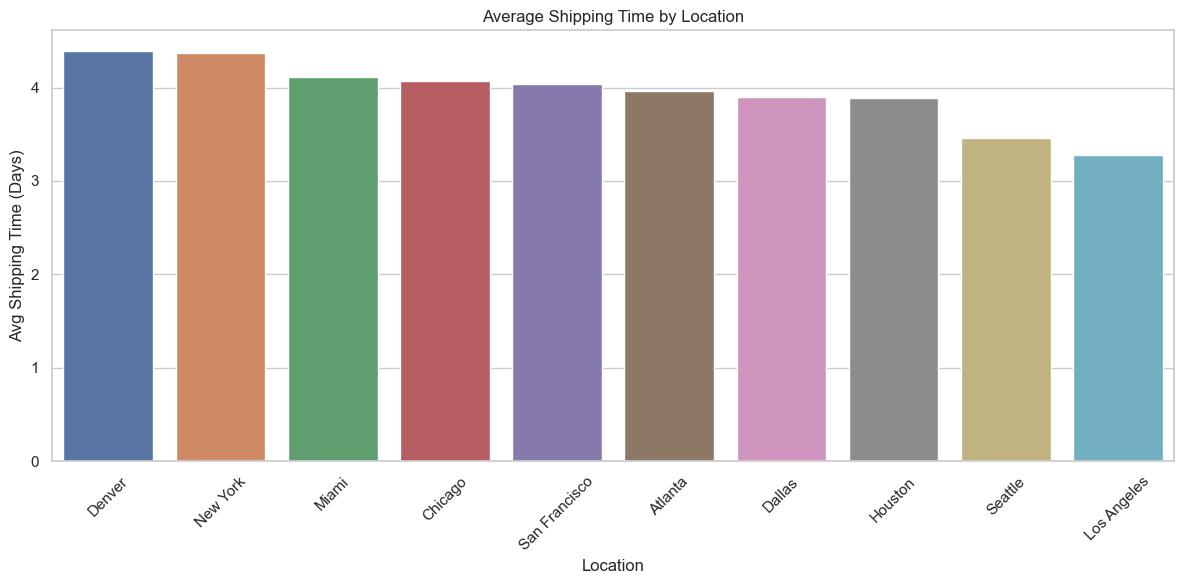

In [6]:
#objective-1
# --- Location vs Avg Shipping Time (bar) ---
plt.figure(figsize=(12,6))
loc_ship = df.groupby("Location", as_index=False)["Shipping_Time_Days"].mean().sort_values("Shipping_Time_Days", ascending=False)
sns.barplot(data=loc_ship, x="Location", y="Shipping_Time_Days")
plt.title("Average Shipping Time by Location")
plt.xlabel("Location")
plt.ylabel("Avg Shipping Time (Days)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# “Locations like Chicago, Denver, Miami, and New York have higher delivery delays due to longer supplier lead times and order processing times.
# To reduce delays, we reroute deliveries through faster locations such as Los Angeles and Seattle, improve supplier lead times, and optimize warehouse processing.”

In [7]:
# Average shipping time per location
slow_locations = (
    df.groupby("Location")["Shipping_Time_Days"]
      .mean()
      .reset_index()
      .sort_values("Shipping_Time_Days", ascending=False)
)

print(slow_locations.head(5))  # top delayed locations


        Location  Shipping_Time_Days
3         Denver            4.391304
7       New York            4.370370
6          Miami            4.107143
1        Chicago            4.068182
8  San Francisco            4.038462


In [8]:
# Fast locations (best performers)
fast_locations = slow_locations.sort_values("Shipping_Time_Days").head(5)

print(fast_locations)


      Location  Shipping_Time_Days
5  Los Angeles            3.277778
9      Seattle            3.454545
4      Houston            3.886364
2       Dallas            3.901961
0      Atlanta            3.963636


In [9]:
# Check lead time and processing time in slow locations
delay_reason = (
    df[df["Location"].isin(slow_locations["Location"].head(5))]
    .groupby("Location")[["Lead_Time_Days", "Order_Processing_Time"]]
    .mean()
    .reset_index()
)

print(delay_reason)


        Location  Lead_Time_Days  Order_Processing_Time
0        Chicago        6.659091               2.583224
1         Denver        5.891304               2.751016
2          Miami        6.017857               2.844506
3       New York        6.018519               2.858928
4  San Francisco        5.500000               2.629517


In [10]:
# Fast locations you identified
fast_locations = [
    "Los Angeles",
    "Seattle",
    "Houston",
    "Dallas",
    "Atlanta"
]

# Find avg lead time & processing time for fast locations
fast_location_metrics = (
    df[df["Location"].isin(fast_locations)]
    .groupby("Location")[["Lead_Time_Days", "Order_Processing_Time"]]
    .mean()
    .reset_index()
)

print(fast_location_metrics)


      Location  Lead_Time_Days  Order_Processing_Time
0      Atlanta        5.927273               2.610107
1       Dallas        6.352941               3.119659
2      Houston        5.181818               2.638022
3  Los Angeles        6.685185               2.915122
4      Seattle        5.181818               2.465117


In [12]:
#OBJECTIVE-2
# Create shortage column
df["Stock_Shortage"] = df["Demand_Forecast"] - df["Current_Stock"]

# Warehouses with highest shortage
shortage_df = (
    df[df["Stock_Shortage"] > 0]
    .groupby("Warehouse_ID")["Stock_Shortage"]
    .sum()
    .reset_index()
    .sort_values("Stock_Shortage", ascending=False)
)

print(shortage_df.head(5))


    Warehouse_ID  Stock_Shortage
81         WH187            8031
164        WH390            7358
102        WH232            6451
204        WH486            5916
89         WH202            5885


In [13]:
df["Capacity_Utilization"] = df["Current_Stock"] / df["Warehouse_Capacity"]

capacity_df = (
    df.groupby("Warehouse_ID")["Capacity_Utilization"]
    .mean()
    .reset_index()
    .sort_values("Capacity_Utilization", ascending=False)
)

print(capacity_df.head(5))


    Warehouse_ID  Capacity_Utilization
244        WH396              0.442484
107        WH165              0.419603
154        WH248              0.367632
140        WH221              0.366018
47         WH071              0.363732


<Figure size 1200x500 with 0 Axes>

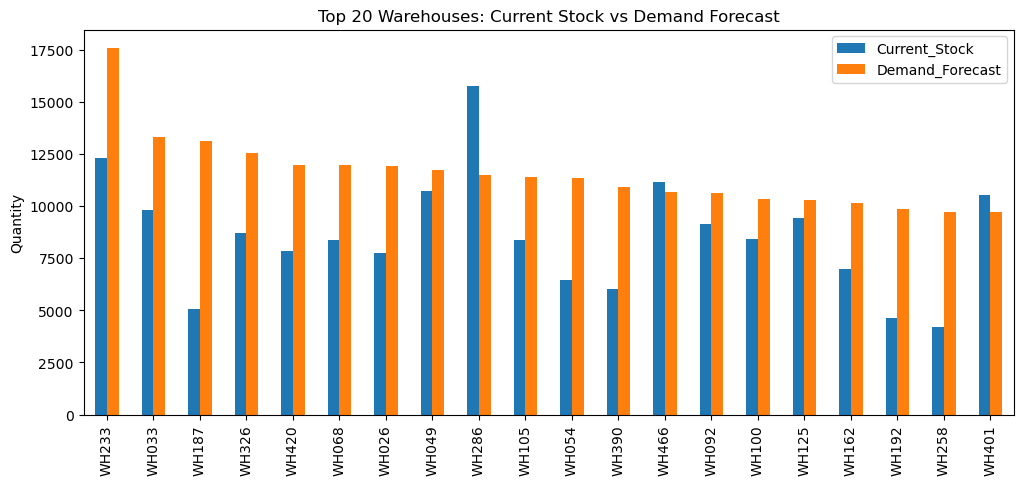

In [19]:
#objective2
if {"Warehouse_ID","Current_Stock","Demand_Forecast"}.issubset(df.columns):
    agg = df.groupby("Warehouse_ID", as_index=False)[["Current_Stock","Demand_Forecast"]].sum()
    agg = agg.sort_values("Demand_Forecast", ascending=False).head(20)
    agg_m = agg.set_index("Warehouse_ID")
    plt.figure(figsize=(12,5))
    agg_m[["Current_Stock","Demand_Forecast"]].plot(kind="bar", figsize=(12,5))
    plt.title("Top 20 Warehouses: Current Stock vs Demand Forecast")
    plt.xlabel("")
    plt.ylabel("Quantity")
    plt.xticks(rotation=90)
    plt.show()

In [16]:
#OBJECTIVE-3
df["Forecast_Error"] = df["Demand_Forecast"] - df["Monthly_Sales"]

forecast_error = (
    df.groupby("Product_Category")["Forecast_Error"]
    .mean()
    .reset_index()
    .sort_values("Forecast_Error", ascending=False)
)

print(forecast_error)


  Product_Category  Forecast_Error
0          Apparel    -2160.292035
4        Groceries    -2169.666667
2      Electronics    -2492.510000
1       Automotive    -2506.955056
3        Furniture    -2634.010753


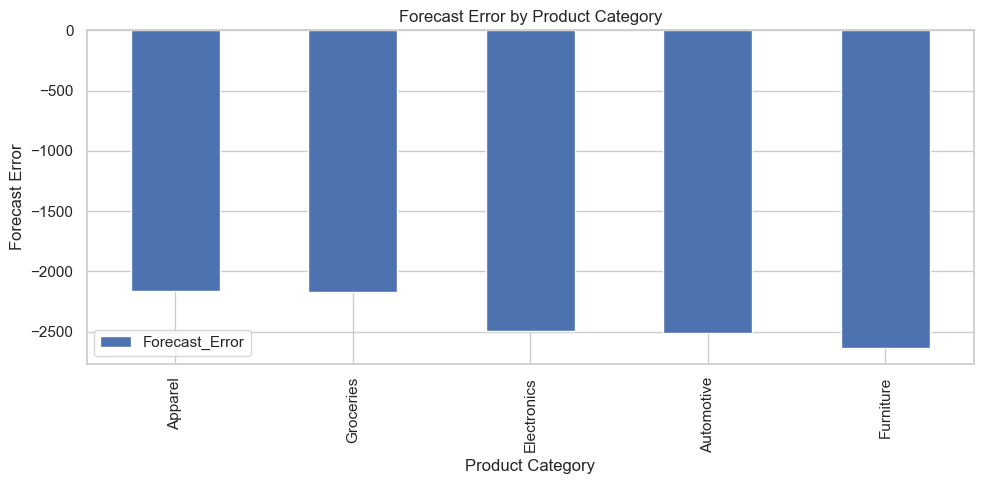

In [17]:
import matplotlib.pyplot as plt

forecast_error.set_index("Product_Category").plot(
    kind="bar",
    figsize=(10,5)
)

plt.title("Forecast Error by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Forecast Error")
plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

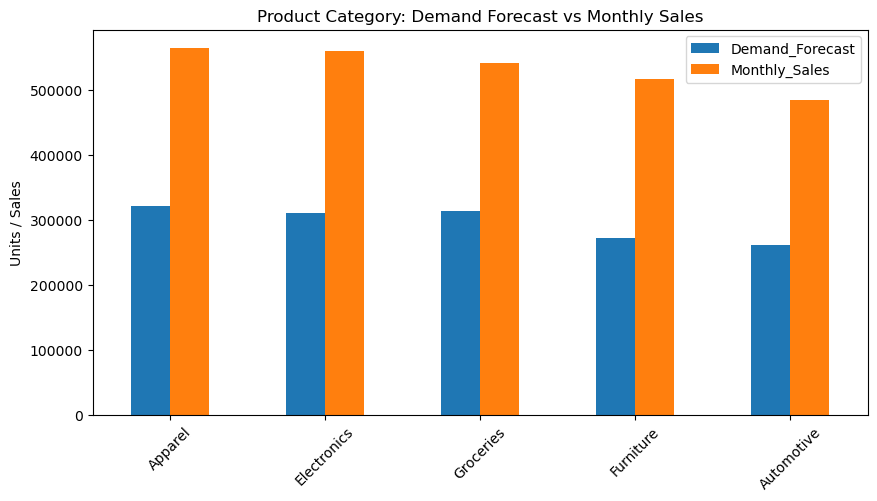

In [21]:
#objective3
if {"Product_Category","Demand_Forecast","Monthly_Sales"}.issubset(df.columns):
    pc = df.groupby("Product_Category", as_index=False)[["Demand_Forecast","Monthly_Sales"]].sum().sort_values("Monthly_Sales", ascending=False)
    pc_m = pc.set_index("Product_Category")
    plt.figure(figsize=(10,5))
    pc_m[["Demand_Forecast","Monthly_Sales"]].plot(kind="bar", figsize=(10,5))
    plt.title("Product Category: Demand Forecast vs Monthly Sales")
    plt.xlabel("")
    plt.ylabel("Units / Sales")
    plt.xticks(rotation=45)
    plt.show()
    

In [18]:
`                                                            #OBJECTIVE-4
df["Total_Cost"] = (
    df["Operational_Cost"] +
    df["Storage_Cost"] +
    df["Transportation_Cost"]
)

df["Estimated_Profit"] = df["Monthly_Sales"] - df["Total_Cost"]


In [19]:
profit_df = (
    df.groupby("Product_Category")["Estimated_Profit"]
    .sum()
    .reset_index()
    .sort_values("Estimated_Profit")
)

print(profit_df.head(5))


  Product_Category  Estimated_Profit
0          Apparel          -9283808
4        Groceries          -8117998
2      Electronics          -7779895
3        Furniture          -7218316
1       Automotive          -7007834


In [20]:
df["Cost_to_Sales"] = df["Total_Cost"] / df["Monthly_Sales"]

cost_ratio = (
    df.groupby("Warehouse_ID")["Cost_to_Sales"]
    .mean()
    .reset_index()
    .sort_values("Cost_to_Sales", ascending=False)
)

print(cost_ratio.head(5))


    Warehouse_ID  Cost_to_Sales
53         WH078      92.156250
157        WH253      83.517960
246        WH398      82.940163
185        WH302      81.936885
251        WH407      77.203356


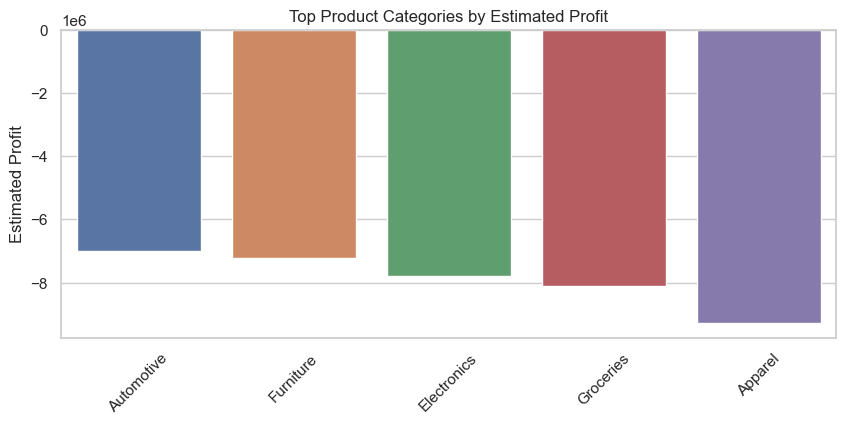

In [40]:
#objective4
costs = [c for c in ["Operational_Cost","Storage_Cost","Transportation_Cost"] if c in df.columns]
if "Monthly_Sales" in df.columns and costs:
    df["Estimated_Costs"] = df[costs].sum(axis=1)
    df["Estimated_Profit"] = df["Monthly_Sales"] - df["Estimated_Costs"]
    pc_profit = df.groupby("Product_Category", as_index=False)["Estimated_Profit"].sum().sort_values("Estimated_Profit", ascending=False)
    plt.figure(figsize=(10,4))
    sns.barplot(data=pc_profit.head(12), x="Product_Category", y="Estimated_Profit")
    plt.title("Top Product Categories by Estimated Profit")
    plt.xlabel("")
    plt.ylabel("Estimated Profit")
    plt.xticks(rotation=45)
    plt.show()